In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [72]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 5
t = np.arange(0,5000,0.1)
K = 4.1
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

Text(0.5, 1.0, 'm = 5, K = 4.1')

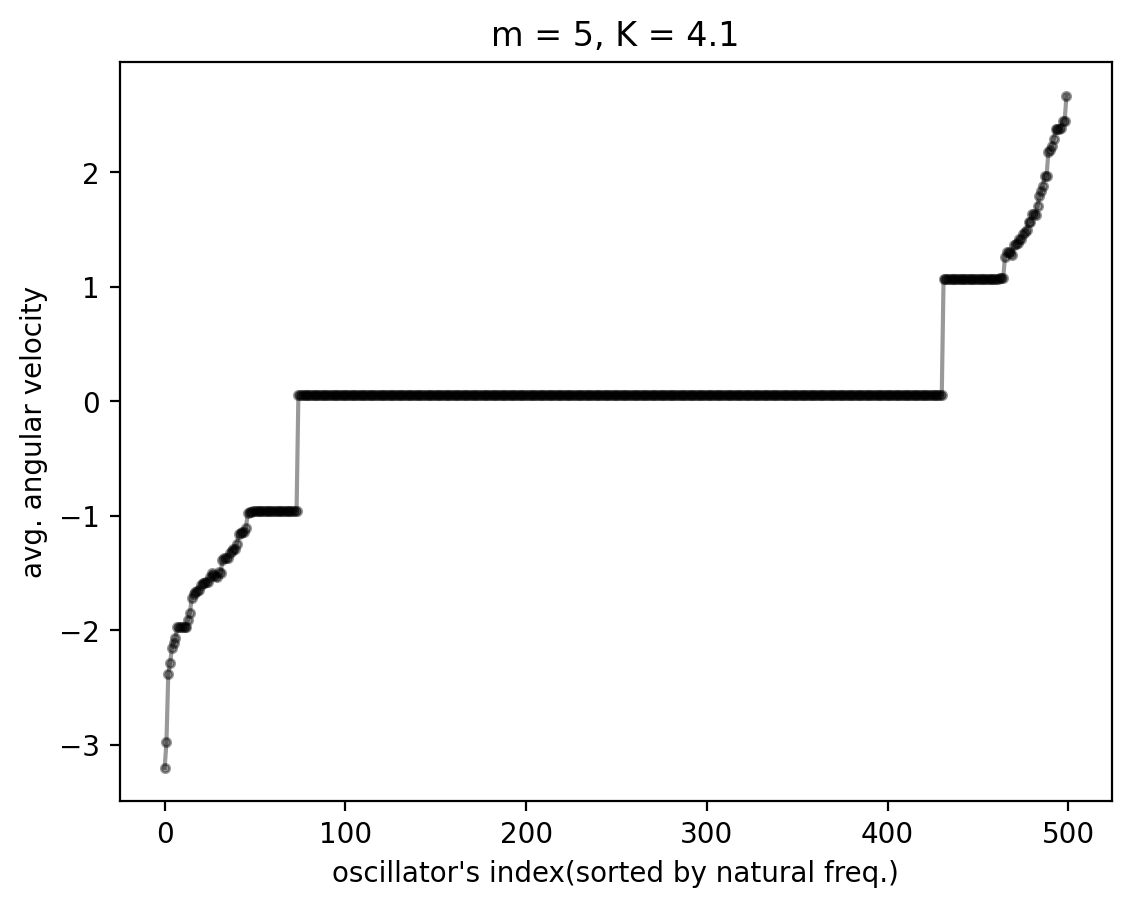

In [74]:
plt.plot(avg_dtheta[-1,...].T,'.-',color='black',alpha=0.4);
plt.xlabel('oscillator\'s index(sorted by natural freq.)')
plt.ylabel('avg. angular velocity')
plt.title(f'm = {m}, K = {K}')

In [53]:
n_dtheta = dtheta / np.max(abs(dtheta))

In [54]:
np.max(1- abs(n_dtheta)/2)

0.999999999529609

In [55]:
theta[0].shape

(500,)

In [56]:
def time_oscillator_dict(i):
    norm = n_dtheta[i]
    A = (1 - (norm)/2)
    theta_ = theta[i]
    sin,cos = A*np.sin(theta_), A*np.cos(theta_)
    
    return {'x':sin,'y':cos,'c':norm,'cmap':'bwr'}

n_dtheta = dtheta / np.max(abs(dtheta))
def time_oscillator(i):
    norm = n_dtheta[i]
    A = (1 - (norm)/2)
    theta_ = theta[i]
    sin,cos = A*np.sin(theta_), A*np.cos(theta_)
    
    return sin,cos,norm,np.sin(theta_),np.cos(theta_)
# plt.plot(1+(n_dtheta));

In [57]:
c_ = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(c_),'y':np.sin(c_)
}

In [58]:
from itertools import combinations,permutations


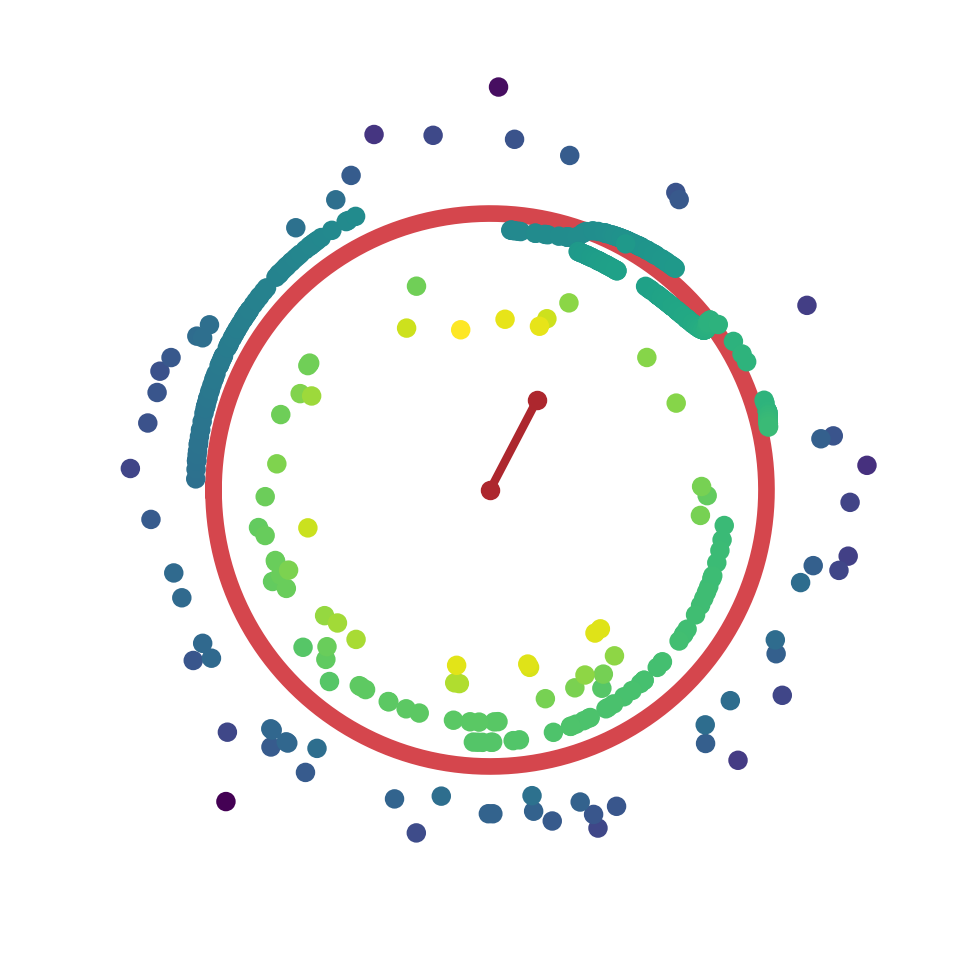

In [59]:
from itertools import combinations,permutations


i = 52000
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=100,facecolor=(1,1,1,0))


X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='#AD272E',lw=3,marker='o',zorder=3)
cmap = 'bwr'
s = 100
data = {
    'x': X,'y':Y,
    'c': omega,#'cmap':cmap,
    # 'c': colors,#omega,'cmap':'YlOrRd',
}
cax = ax.scatter(**data,zorder=1)



ax.plot(np.cos(c_),np.sin(c_),zorder=0,color='#D5464D',lw=6)
ax.set_xlim(-1.7,1.7)
ax.set_ylim(-1.7,1.7)
ax.axis('off')
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

In [60]:
fig.set_facecolor('white')
def ANI(i):
    ax.clear()
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='#AD272E',lw=3,marker='o',zorder=3)
    cmap = 'bwr'
    s = 100
    data = {
        'x': X,'y':Y,
        'c': C_,#'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax = ax.scatter(**data,zorder=1)



    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color='#D5464D',lw=6)
    ax.set_xlim(-1.7,1.7)
    ax.set_ylim(-1.7,1.7)
    ax.axis('off')
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
    plt.tight_layout()
    # ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

In [61]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [62]:
t

array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 9.9997e+03, 9.9998e+03,
       9.9999e+03])

In [63]:
len(t)//2

50000

C:\Users\kim9y\AppData\Local\Temp\ipykernel_46860\2082673300.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  plt.plot(dtheta[-1000::100].T,'r.',alpha=0.1,color ='black');


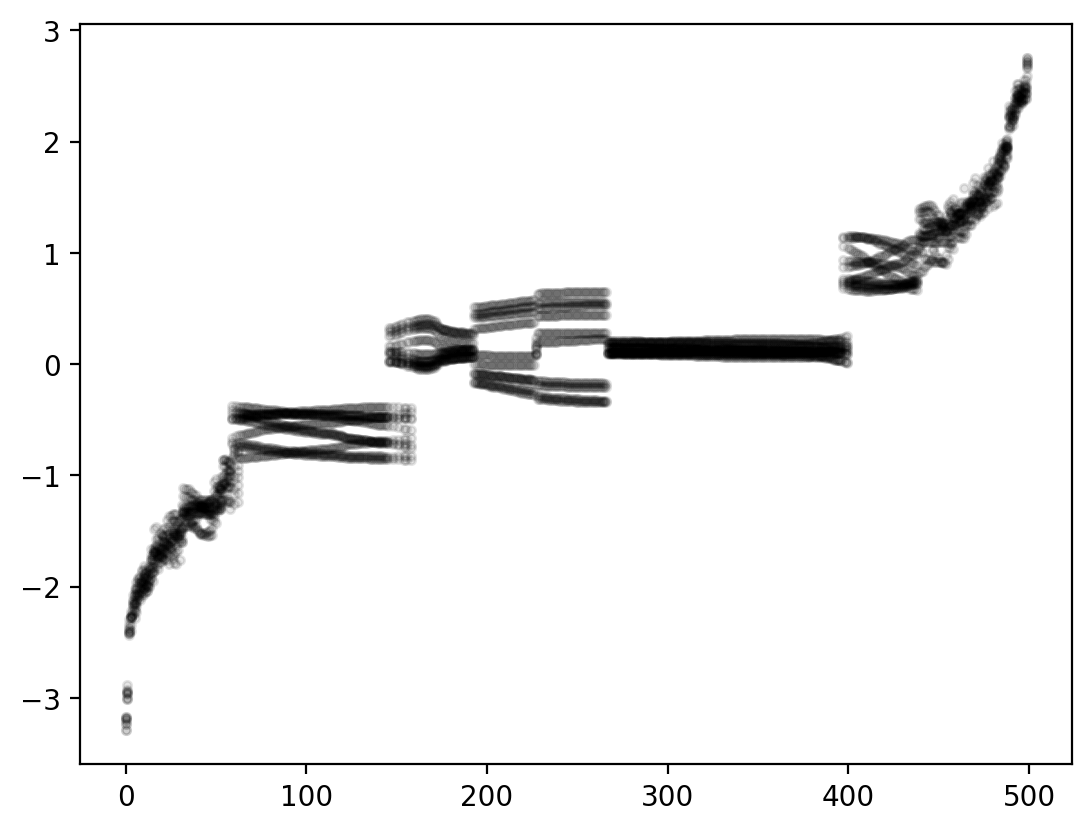

In [64]:
plt.plot(dtheta[-1000::100].T,'r.',alpha=0.1,color ='black');

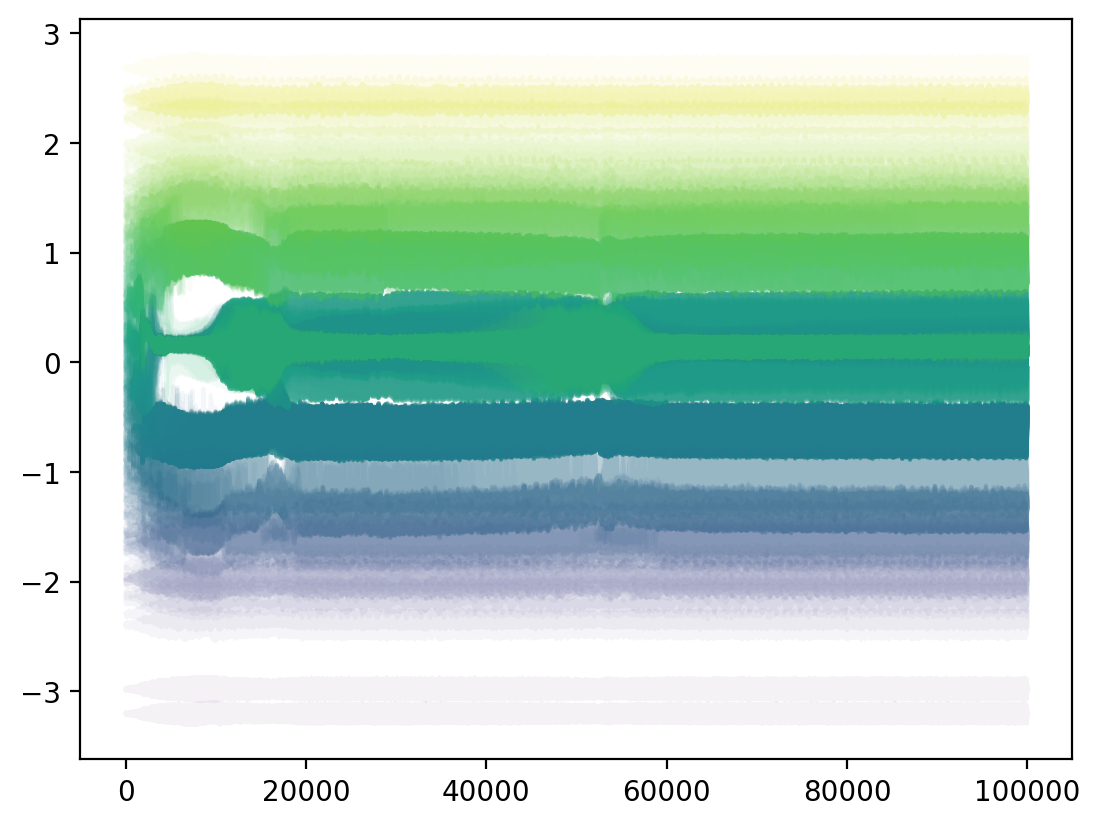

In [65]:
ln = plt.plot(dtheta,alpha=0.05,color ='blue');
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
for i,l in enumerate(ln):
    l.set_color(color[i])

In [67]:
c_dtheta= np.cumsum(dtheta,axis=0)
sum_time = 500
avg_dtheta = (c_dtheta[sum_time:]-c_dtheta[:-sum_time])/sum_time


c_rs= np.cumsum(rs,axis=0)
sum_time = 500
avg_rs = (c_rs[sum_time:]-c_rs[:-sum_time])/sum_time
std_rs = [np.std(rs[i:sum_time+i]) for i in range(len(rs)-sum_time)]
# data = np

In [68]:
multi_ = 1.5

Text(0.5, 1.0, '$\\omega_i$')

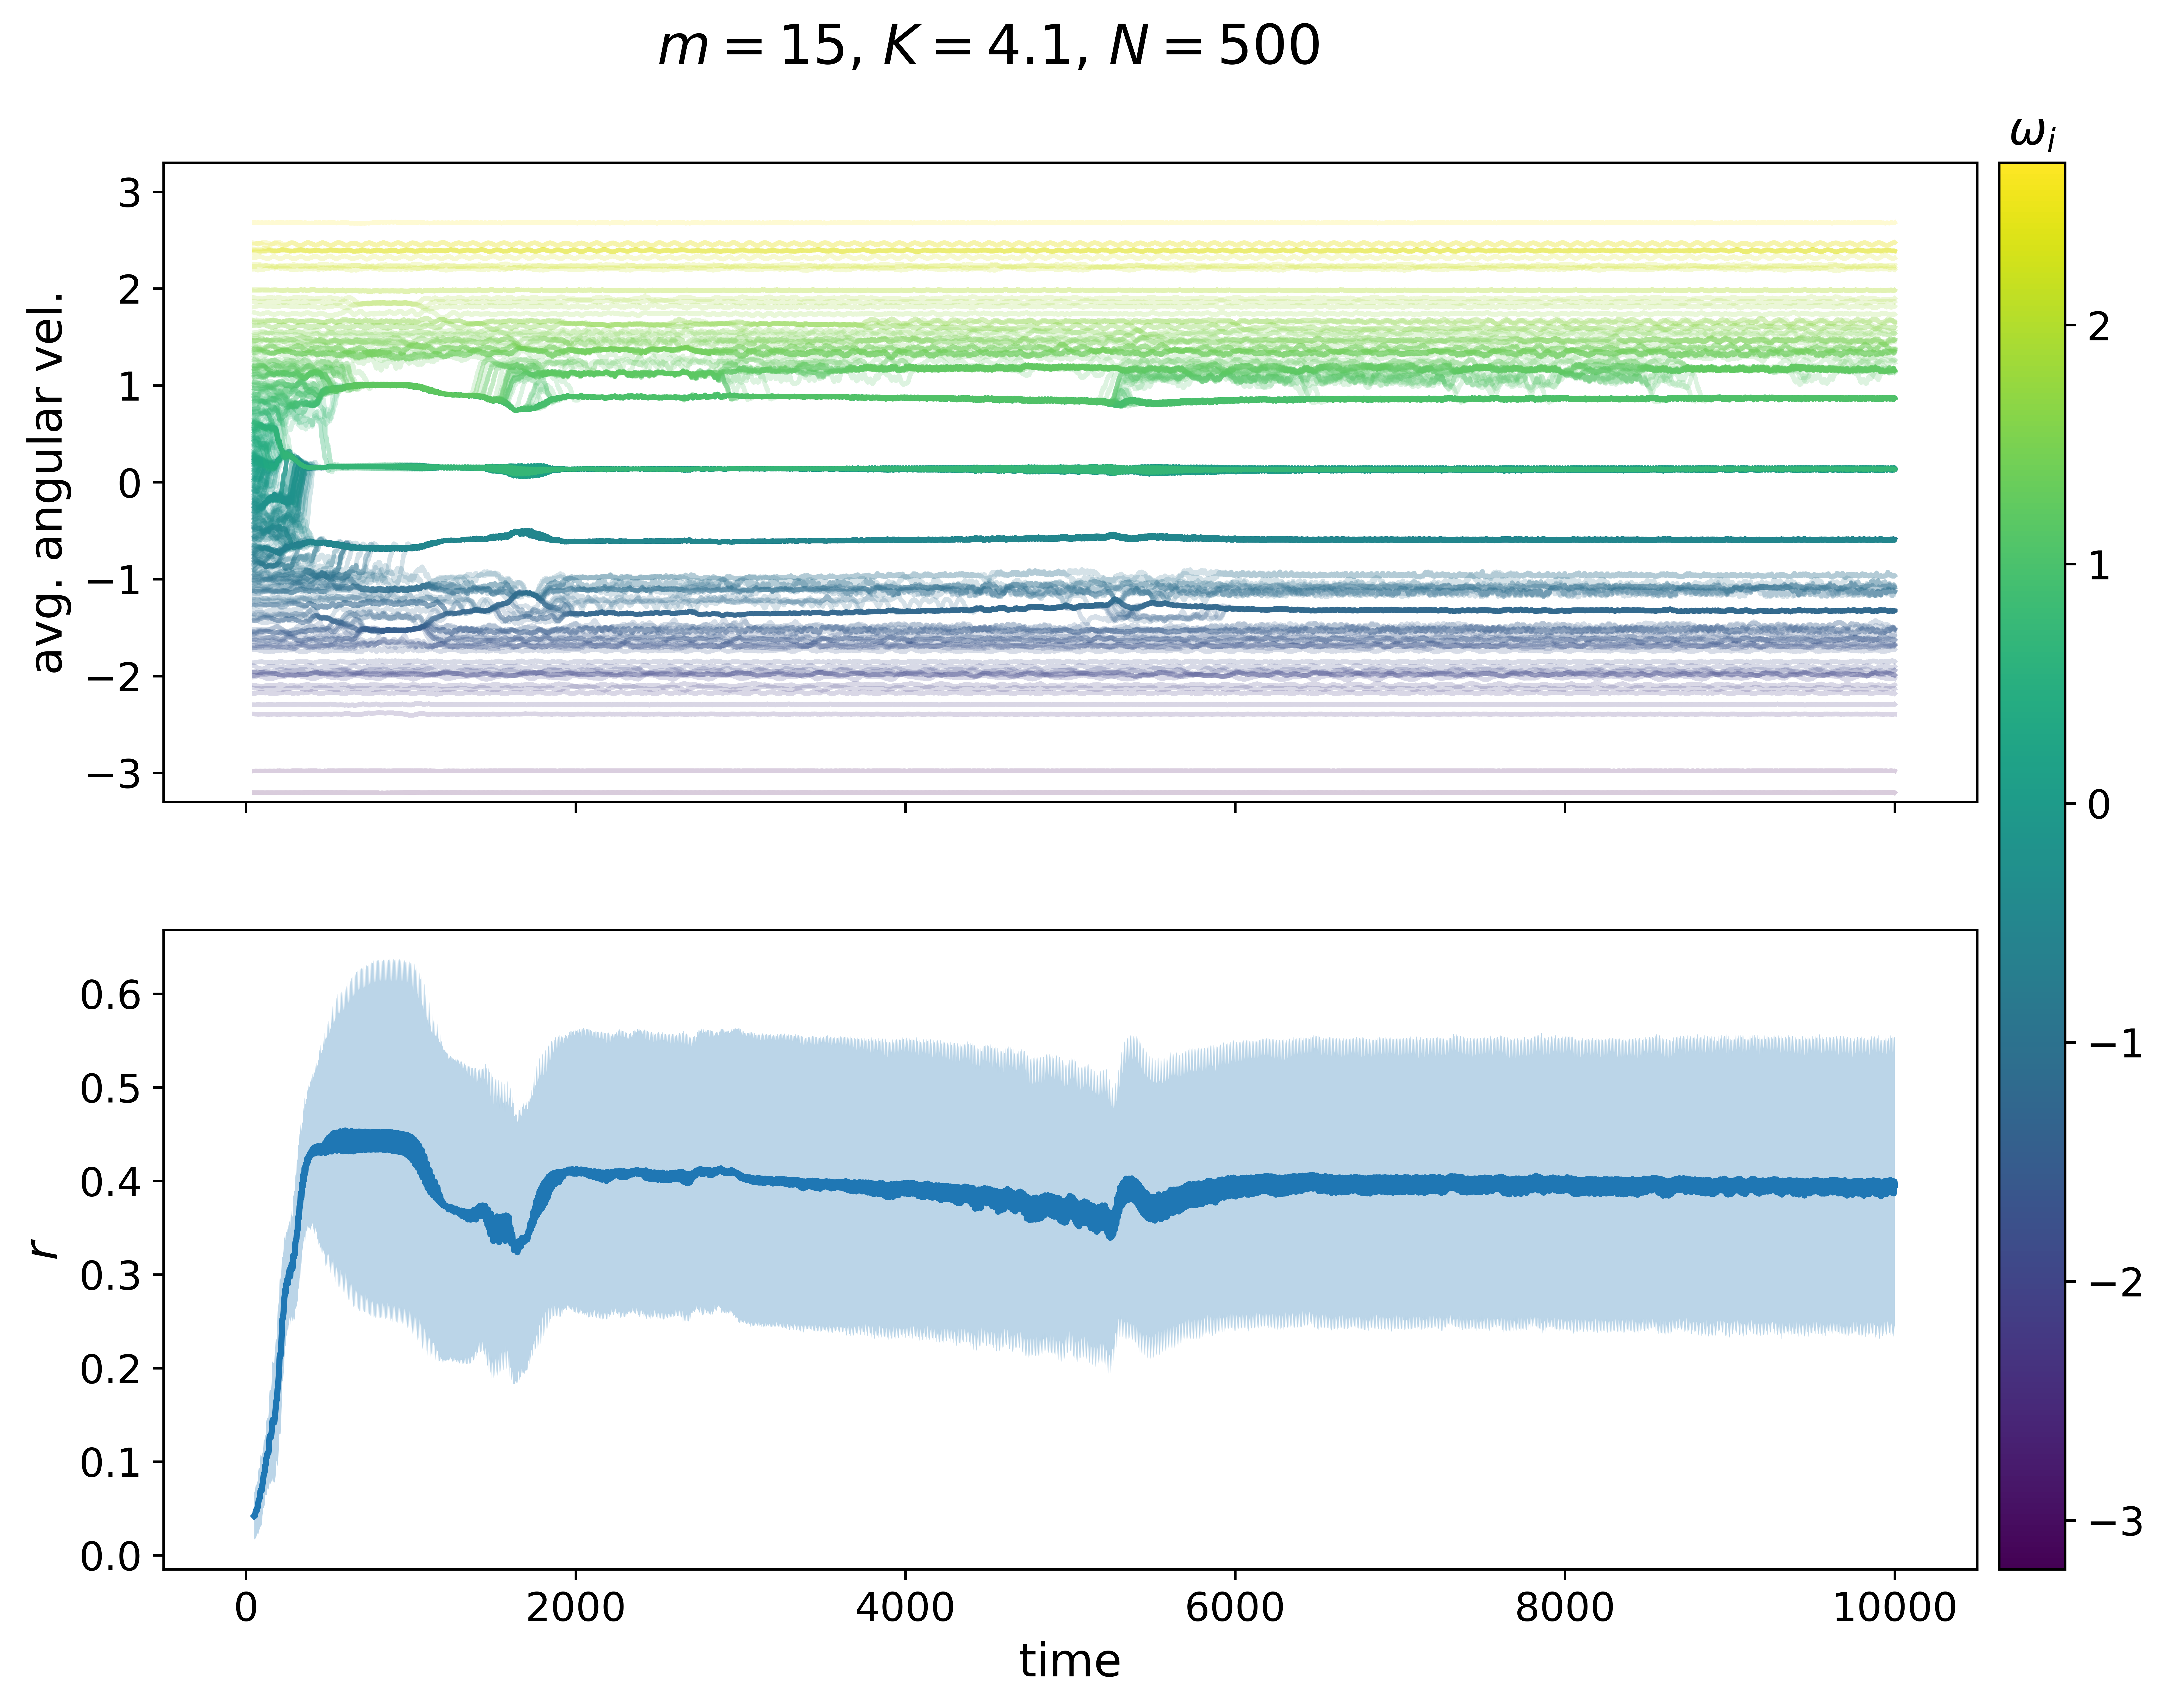

In [69]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8),dpi=400, sharex=True)

plt.sca(ax1)
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
ln = plt.plot(t[sum_time:],avg_dtheta,alpha=0.2);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
# plt.vlines(t[sum_time+0],-3.3,3.3,alpha=0.7,color = 'tab:red',lw=3,ls='--')
# plt.vlines(t[sum_time+1450],-3.3,3.3,alpha=0.7,color = 'tab:red',lw=3,ls='--')
# plt.vlines(t[sum_time+5000],-3.3,3.3,alpha=0.7,color = 'tab:red',lw=3,ls='--')
plt.ylim(-3.3,3.3)
ax1.set_ylabel(r'avg. angular vel.',fontsize=10*multi_)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.sca(ax2)
ax2.set_ylabel(r'$r$',fontsize=10*multi_)
plt.xlabel('time',fontsize=15)
plt.plot(t[sum_time:],avg_rs,lw=2);
# plt.errorbar(t[sum_time+0],avg_rs[0],std_rs[0],fmt='.',color ='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10,alpha=0.7)
# plt.errorbar(t[sum_time+1450],avg_rs[1450],std_rs[1450],fmt='.',color ='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10,alpha=0.7)
# plt.errorbar(t[sum_time+5000],avg_rs[5000],std_rs[5000],fmt='.',color ='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10,alpha=0.7)
plt.fill_between(t[sum_time:],avg_rs-std_rs,avg_rs+std_rs,alpha=0.3)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.suptitle(r'$m=15$, $K=4.1$, $N=500$',fontsize=18)
plt.subplots_adjust(bottom=0.1, right=0.95, top=0.9)

cax = plt.axes([0.96, 0.1, 0.03, 0.8])
cbar = plt.colorbar(sca,cax=cax)
plt.sca(cax)
plt.yticks(fontsize=13)
cax.set_title(r'$\omega_i$',fontsize=10*multi_)
# plt.plot(std_rs)
# plt.tight_layout()

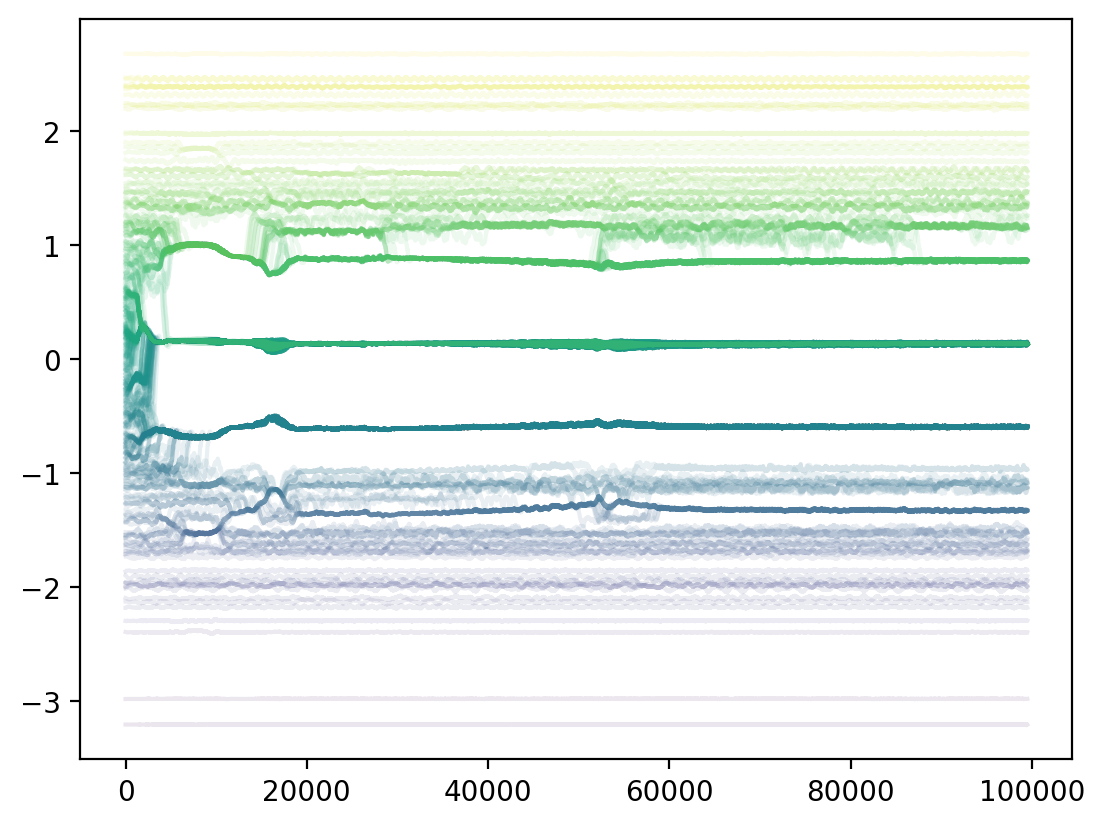

In [70]:
ln = plt.plot(avg_dtheta,alpha=0.1,color ='blue');
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
color = plt.cm.viridis(NORM(omega))
for i,l in enumerate(ln):
    l.set_color(color[i])

In [19]:
sorted_avg = np.sort(avg_dtheta,axis=1)

In [20]:
arg = np.argsort(avg_dtheta[-1])


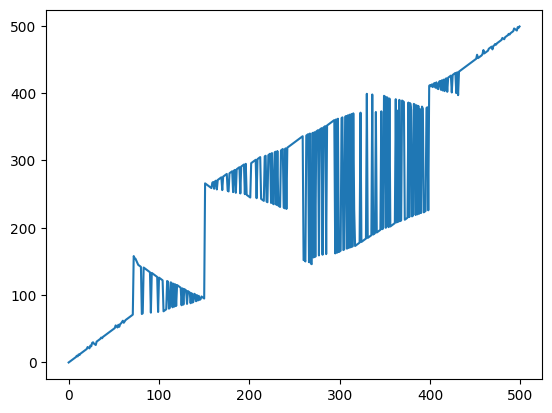

In [21]:
plt.plot(arg)

In [ ]:
plt.scatter(np.arange(500), dtheta[-1].T,c=omega,alpha=0.1);

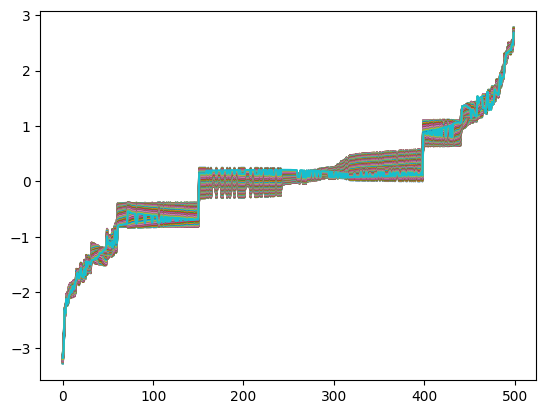

In [22]:
plt.plot(dtheta[-100:,arg].T);

Text(0, 0.5, 'avg. angular velocity')

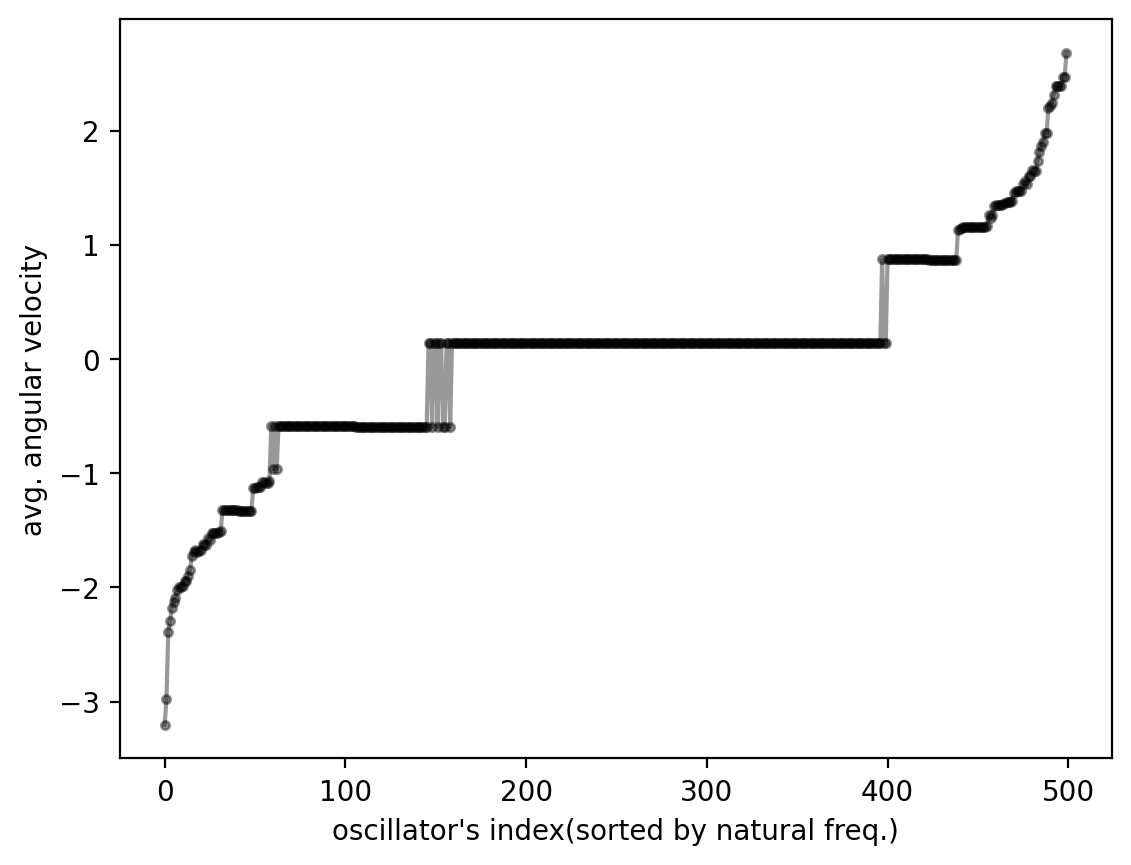

In [71]:
plt.plot(avg_dtheta[-1,...].T,'.-',color='black',alpha=0.4);
plt.xlabel('oscillator\'s index(sorted by natural freq.)')
plt.ylabel('avg. angular velocity')

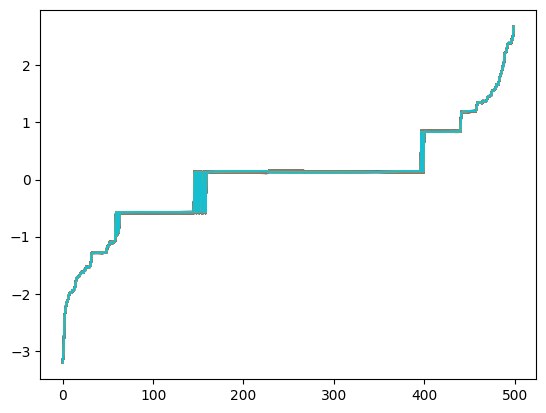

In [25]:
plt.plot(avg_dtheta[-100:,...].T);

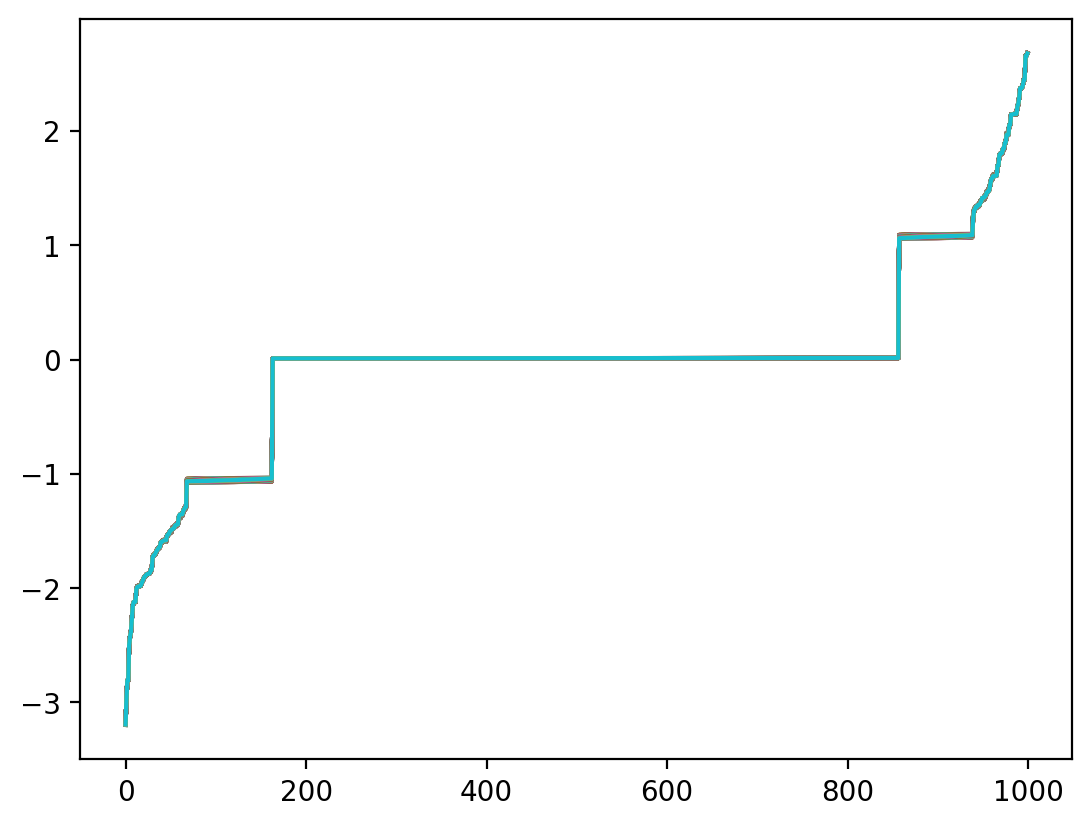

In [68]:
plt.plot(sorted_avg[-100:].T);

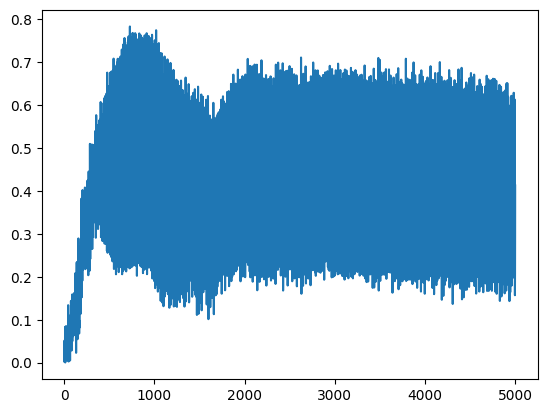

In [26]:
plt.plot(t,rs)

In [ ]:
idxs = range(0,len(t)//10,1)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
# ani.save('Groups oscillation m = 2, K = 2.3.mp4',dpi=400)
HTML(ani.to_html5_video())

In [39]:
0,len(t)//10

(0, 5000)

In [40]:
19*len(t)//20,20*len(t)//20

(47500, 50000)

In [20]:
idxs = range(19*len(t)//20,19*len(t)//20+500,1)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
# ani.save('Groups oscillation m = 2, K = 2.3.mp4',dpi=400)
HTML(ani.to_html5_video())

<Figure size 640x480 with 0 Axes>

In [ ]:
idxs = range(0,len(t)//3,1)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
# ani.save('Groups oscillation m = 2, K = 2.3.mp4',dpi=400)
HTML(ani.to_html5_video())

In [ ]:
from itertools import combinations,permutations

i = Target
index = i
# fig = plt.figure(figsize=(5,5))
colors = ['#9D281B','#DC4838']

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))
data = {
    'x': np.sin(z[:,i]),'y':np.cos(z[:,i]),
    'c': omega,'cmap':'YlGnBu',
    # 'c': colors,#omega,'cmap':'YlOrRd',
    's':800
}
X = np.sin(z[:,i])
Y = np.cos(z[:,i])
line = {
    'x':list(permutations(X,2)),
    'y':list(permutations(Y,2))
}  
# plt.plot(tempx,tempy)
lw = 1
# colors = ['#9D281B','#DC4838']
for i in range(len(line['x'])):
    ax.plot(line['x'][i],line['y'][i],color='#7FB7EF',zorder=0,lw=lw,alpha=0.1)
ax.plot([0,np.mean(X)],[0,np.mean(Y)],color='#0D3863',lw=3,marker='o')
i = index

ax.plot(np.cos(x),np.sin(x),zorder=0,color='#3F93E6',lw=6)
cax = ax.scatter(**data,zorder=1)
ax.set_xlim(-1.2,1.2)
ax.set_ylim(-1.2,1.2)
ax.axis('off')
plt.tight_layout()
# ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)